20180634_최준혁

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/chris/Desktop/서강대학교/7학기/머신러닝/econ2005-master/econ2005-master/datasets/titanic_processed.csv",encoding='euc-kr') 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S


In [3]:
data = df.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1305 non-null   int64  
 1   pclass    1305 non-null   int64  
 2   sex       1305 non-null   object 
 3   age       1305 non-null   float64
 4   sibsp     1305 non-null   int64  
 5   parch     1305 non-null   int64  
 6   fare      1305 non-null   float64
 7   embarked  1305 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.7+ KB


In [5]:
display(data.describe())
display(data.skew())

,survived,pclass,age,sibsp,parch,fare
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000
mean,0.381609,2.297318,29.387101,0.500383,0.386207,33.464153
std,0.485968,0.836587,13.139617,1.042888,0.866624,51.683545
min,0.000000,1.000000,0.166700,0.000000,0.000000,3.170800
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.458300
75%,1.000000,3.000000,35.500000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


survived    0.487985
pclass     -0.603846
age         0.479030
sibsp       3.838341
parch       3.662997
fare        4.388798
dtype: float64

In [6]:
cat_data = data[['survived','sex','pclass','sibsp','parch','embarked']]
ctn_data = data[['age','fare']]

display(cat_data.head())
display(ctn_data.head())

,survived,sex,pclass,sibsp,parch,embarked
0,1,female,1,0,0,S
1,1,male,1,1,2,S
2,0,female,1,1,2,S
3,0,male,1,1,2,S
4,0,female,1,1,2,S


,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


## 개별 변수 시각화

##### 범주형 변수 시각화

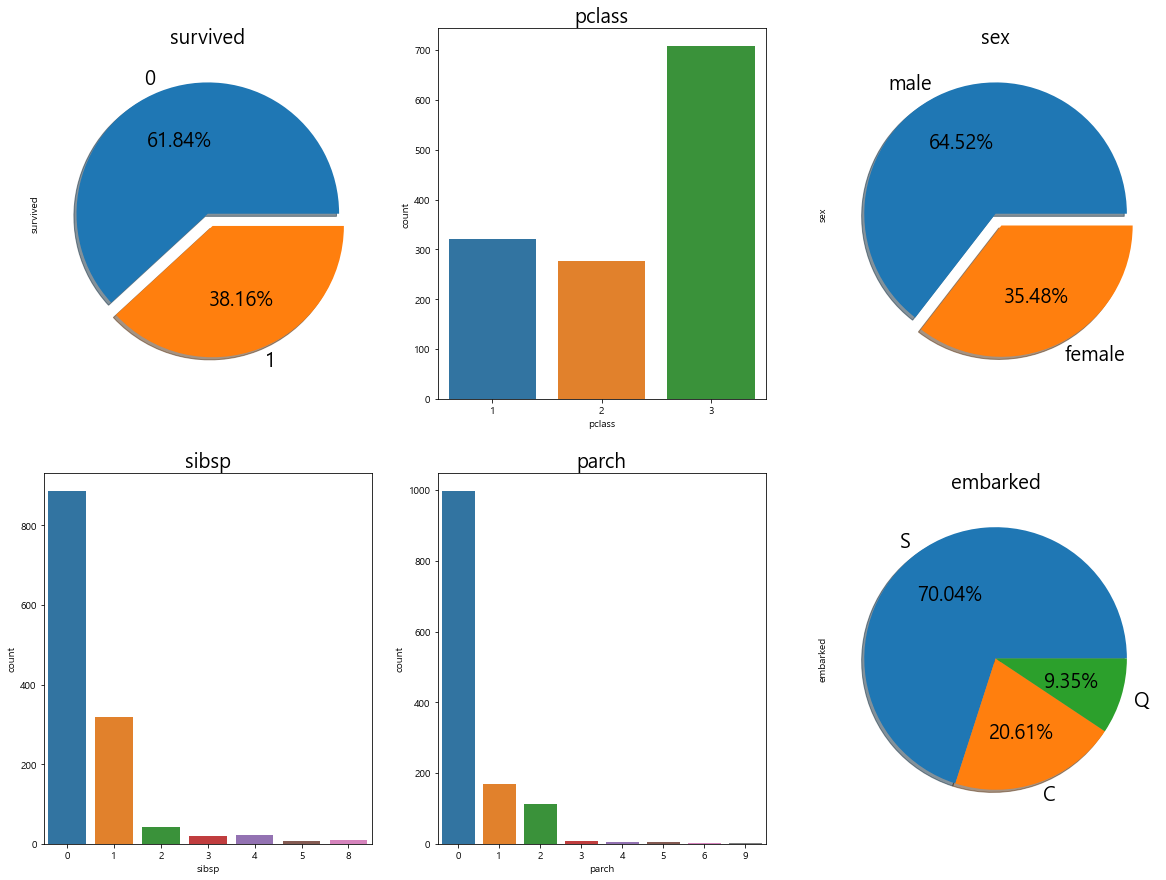

In [7]:
f, ax = plt.subplots(2, 3, figsize=(20, 15))
    
#파이차트
data['survived'].value_counts().plot.pie(explode=[0, 0.1],autopct='%1.2f%%',ax=ax[0][0],shadow=True,fontsize=20)
ax[0][0].set_title('survived',fontsize=20)

#카운트플랏
sns.countplot('pclass', data=data, ax=ax[0][1])
ax[0][1].set_title('pclass',fontsize=20)

data['sex'].value_counts().plot.pie(explode=[0, 0.1],autopct='%1.2f%%',ax=ax[0][2],shadow=True,fontsize=20)
ax[0][2].set_title('sex',fontsize=20)

sns.countplot('sibsp', data=data, ax=ax[1][0])
ax[1][0].set_title('sibsp',fontsize=20)

sns.countplot('parch', data=data, ax=ax[1][1])
ax[1][1].set_title('parch',fontsize=20)

data['embarked'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1][2],shadow=True,fontsize=20)
ax[1][2].set_title('embarked',fontsize=20)

plt.show()

##### 연속형 변수 시각화

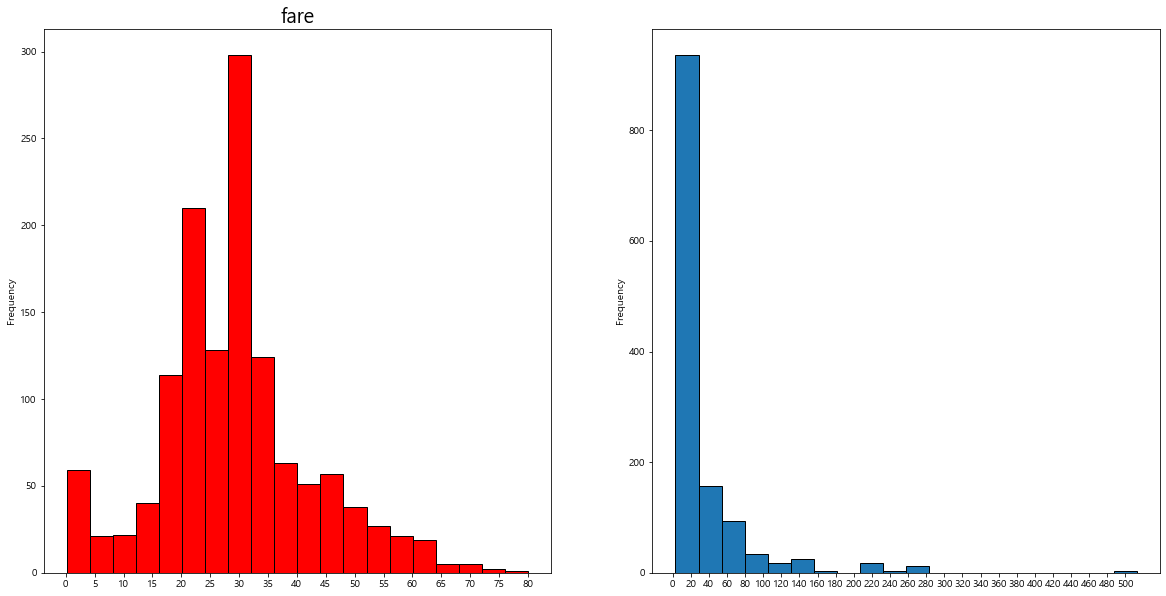

In [8]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

#히스토그램

data.age.plot.hist(ax=ax[0],bins=20, edgecolor='black',color='red')
ax[0].set_title('age', fontsize = 20)
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

# 히스토그램
data.fare.plot.hist(ax=ax[1],bins=20,edgecolor='black')
ax[0].set_title('fare', fontsize = 20)
x2 = list(range(0, 512, 20))
ax[1].set_xticks(x2)

plt.show()

## 여러 변수를 이용한 시각화

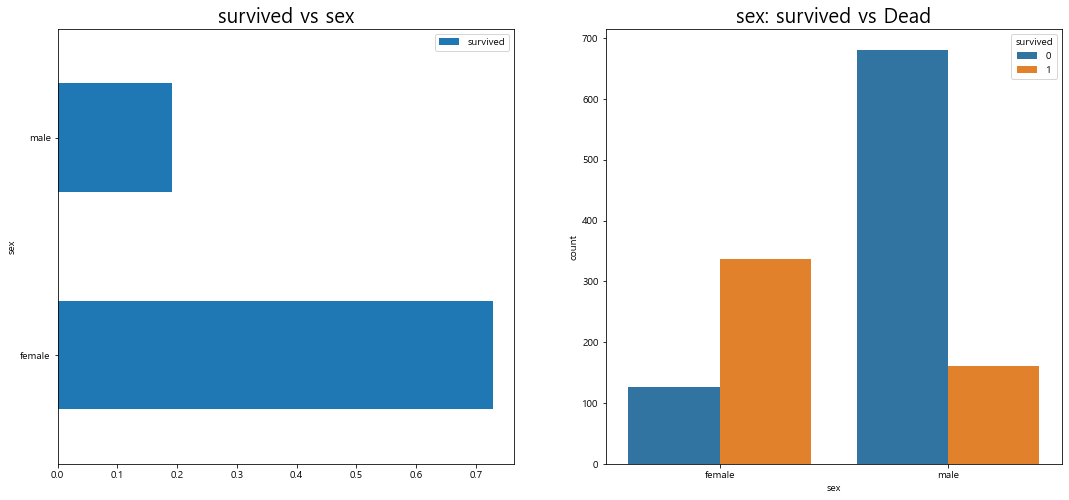

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['sex', 'survived']].groupby(['sex']).mean().plot.barh(ax=ax[0]) 
ax[0].set_title('survived vs sex',fontsize= 20) 

sns.countplot('sex', hue='survived', data=data, ax=ax[1])
ax[1].set_title('sex: survived vs Dead',fontsize= 20)

plt.show()

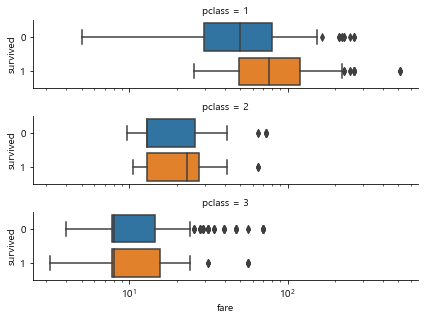

In [10]:
plot = sns.catplot(x="fare", y="survived", row="pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data.query("fare > 0")) 
plot.set(xscale="log"); 

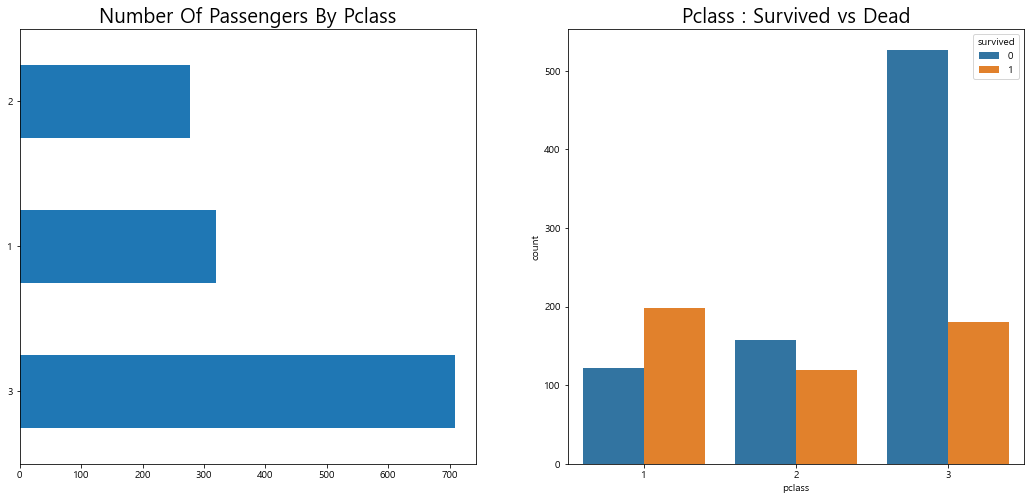

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 가로형 막대 그래프: barh
data['pclass'].value_counts().plot.barh(ax=ax[0]) 
ax[0].set_title('Number Of Passengers By Pclass',fontsize= 20)

# 카운트 플랏
sns.countplot(x='pclass', hue='survived', data=data, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead',fontsize= 20)
plt.show()

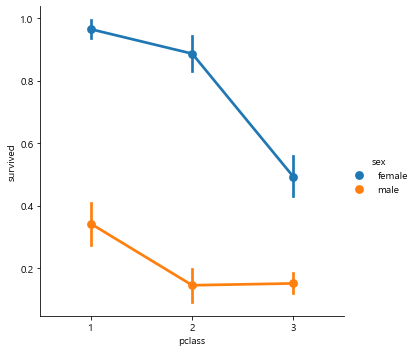

In [12]:
sns.factorplot('pclass', 'survived', hue='sex', data=data)
plt.show()

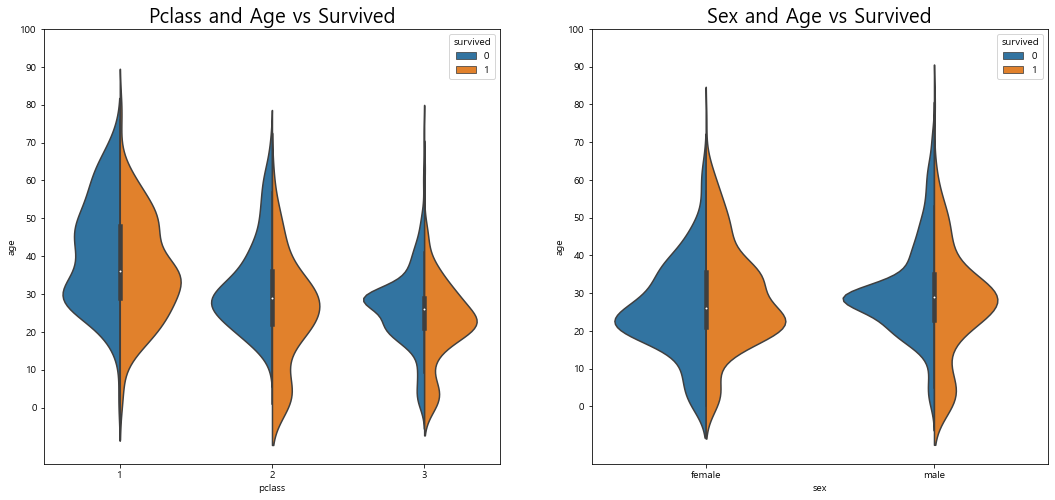

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('pclass','age',hue='survived', data=data,split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived',fontsize= 20)
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('sex', 'age', hue='survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived',fontsize= 20)
ax[1].set_yticks(range(0, 110, 10))
plt.show()

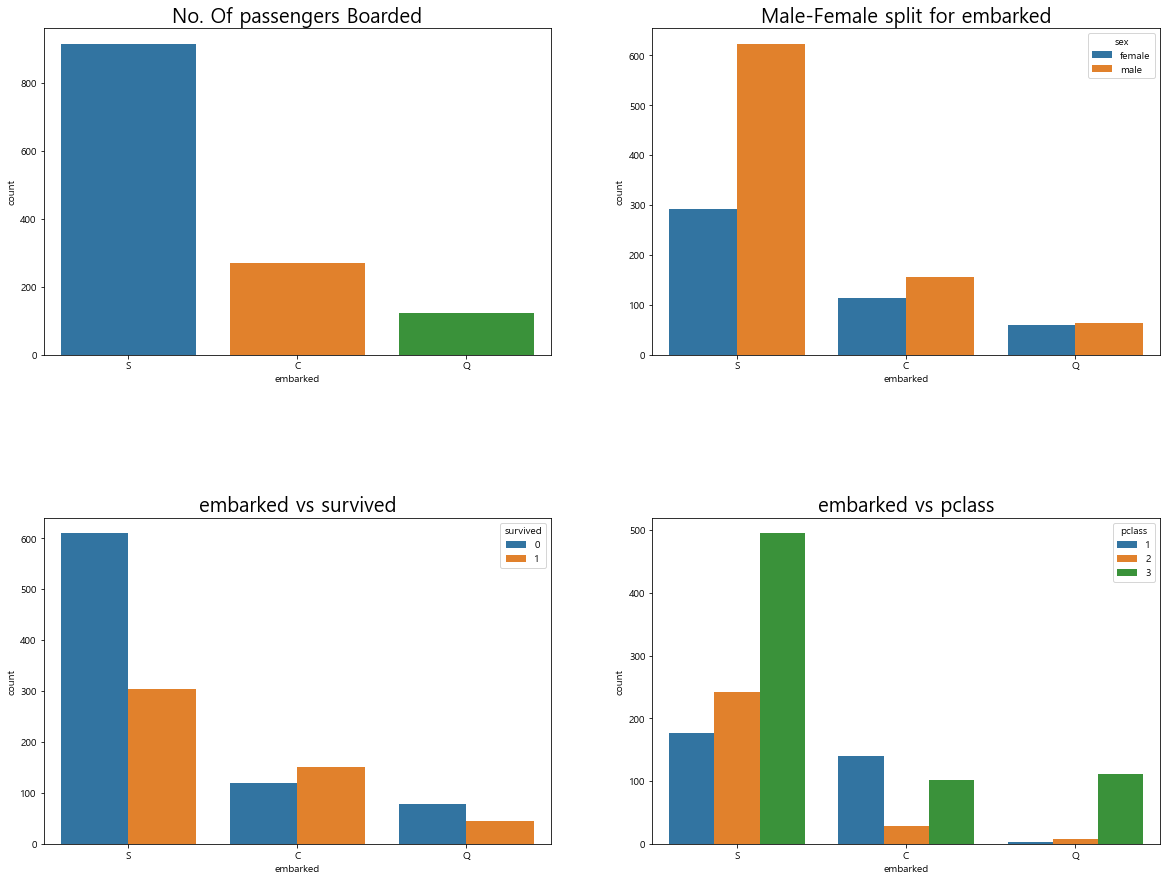

In [14]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

#카운트플랏

sns.countplot('embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of passengers Boarded',fontsize= 20)

sns.countplot('embarked', hue='sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female split for embarked',fontsize= 20)

sns.countplot('embarked', hue='survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('embarked vs survived',fontsize= 20)

sns.countplot('embarked', hue='pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('embarked vs pclass',fontsize= 20)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

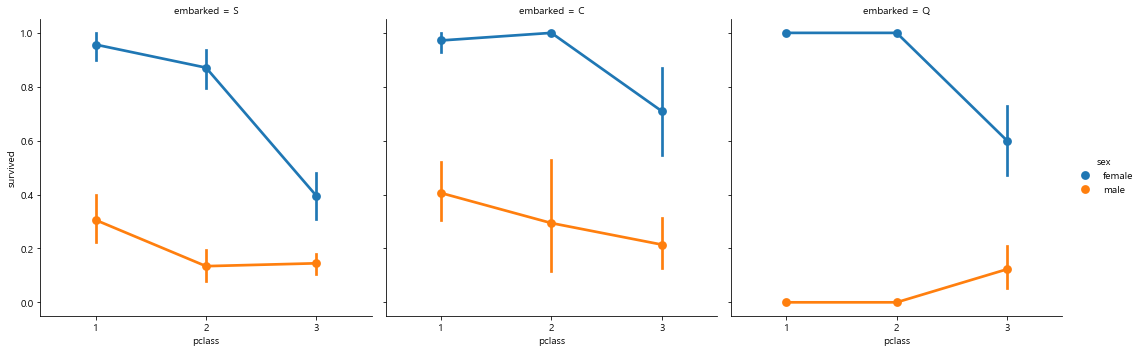

In [15]:
sns.factorplot('pclass', 'survived', hue='sex', col='embarked', data=data)
plt.show()

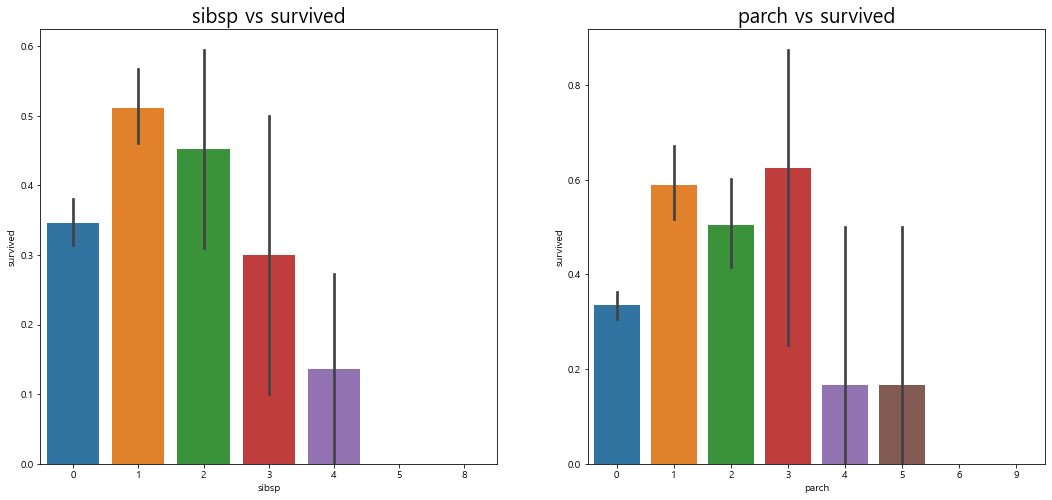

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot('sibsp', 'survived', data=data, ax = ax[0])
ax[0].set_title('sibsp vs survived',fontsize= 20)

sns.barplot('parch', 'survived', data=data, ax = ax[1])
ax[1].set_title('parch vs survived',fontsize= 20)
plt.show()

## 1. 1 자료정리

종속변수는 survived이고 나머지는 독립변수로 두고 각 변수가 생존여부에 어떤 영향을 미치는지 확인한다.<br>
정성변수로 사용할 변수는 sex, embarked, pclass이다. 그 이유는 앞선 시각화 자료를 살펴보았을때<br>
남성과 여성의 생존율, 객실의 등급에 따른 생존율, 탑승한 선착장에 대한 생존율이 다르게 나타났기 때문이다.

더미변수로 변환

In [17]:
encoded_sex = pd.get_dummies(data['sex'], drop_first = True)
data = data.join(encoded_sex)
data.drop(columns=['sex'],inplace = True)
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,male
0,1,1,29.0000,0,0,211.3375,S,0
1,1,1,0.9167,1,2,151.5500,S,1
2,0,1,2.0000,1,2,151.5500,S,0
3,0,1,30.0000,1,2,151.5500,S,1
4,0,1,25.0000,1,2,151.5500,S,0


In [18]:
encoded_pclass = pd.get_dummies(data['pclass'],drop_first = True)
encoded_pclass.columns = ['pclass_2','pclass_3']
data = data.join(encoded_pclass)
data.drop(columns=['pclass'],inplace = True)
data.head()

,survived,age,sibsp,parch,fare,embarked,male,pclass_2,pclass_3
0,1,29.0000,0,0,211.3375,S,0,0,0
1,1,0.9167,1,2,151.5500,S,1,0,0
2,0,2.0000,1,2,151.5500,S,0,0,0
3,0,30.0000,1,2,151.5500,S,1,0,0
4,0,25.0000,1,2,151.5500,S,0,0,0


In [19]:
encoded_embarked = pd.get_dummies(data['embarked'], drop_first = True)
data = data.join(encoded_embarked)
data.drop(columns=['embarked'],inplace = True)
data.head()

,survived,age,sibsp,parch,fare,male,pclass_2,pclass_3,Q,S
0,1,29.0000,0,0,211.3375,0,0,0,0,1
1,1,0.9167,1,2,151.5500,1,0,0,0,1
2,0,2.0000,1,2,151.5500,0,0,0,0,1
3,0,30.0000,1,2,151.5500,1,0,0,0,1
4,0,25.0000,1,2,151.5500,0,0,0,0,1


<AxesSubplot:xlabel='fare', ylabel='Density'>

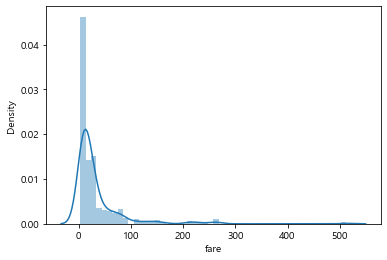

In [20]:
sns.distplot(data.fare) # skewed

In [21]:
log_fare = []
for i in data.fare.tolist():
    log_fare.append(np.log(i))
log_fare

[5.353456381663085,
 5.020915603503812,
 5.020915603503812,
 5.020915603503812,
 5.020915603503812,
 3.279029747687948,
 4.356174068347218,
 3.4011973816621555,
 3.9411778425916384,
 3.902057514460064,
 5.427260122463419,
 5.427260122463419,
 4.238444906195857,
 4.367547313409047,
 3.4011973816621555,
 3.2552077541155913,
 5.5114946188815885,
 5.5114946188815885,
 4.334564151246186,
 4.32070559854228,
 3.961845018011234,
 3.961845018011234,
 3.4011973816621555,
 5.427260122463419,
 5.401682292340279,
 3.258096538021482,
 4.51172945766992,
 4.51172945766992,
 4.909954920578875,
 3.279029747687948,
 3.56953269648137,
 3.4339872044851463,
 5.1051372686027685,
 3.279029747687948,
 3.279029747687948,
 5.569774778140797,
 4.007333185232471,
 3.279029747687948,
 3.417726683613366,
 3.921890164505806,
 3.32218303393412,
 3.9411778425916384,
 4.334564151246186,
 4.901564199041894,
 3.279029747687948,
 3.4339872044851463,
 3.2690935410288184,
 3.3122131507845287,
 6.238967387173662,
 6.238967387

<AxesSubplot:ylabel='Density'>

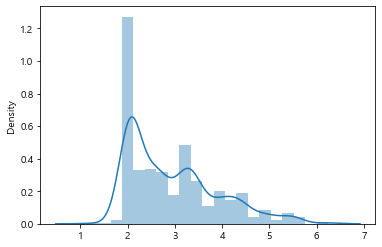

In [22]:
sns.distplot(log_fare)

In [23]:
data['log_fare'] = log_fare
print("---skewness---") ; display(data[['fare','log_fare']].skew())
print("\n---kurtosis---") ; display(data[['fare','log_fare']].kurt()) 
print("\n---variance---") ; display(data[['fare','log_fare']].var()) 

---skewness---


fare        4.388798
log_fare    0.940083
dtype: float64


---kurtosis---


fare        27.212270
log_fare     0.173675
dtype: float64


---variance---


fare        2671.188796
log_fare       0.899480
dtype: float64

로그 변환된 log_fare를 fare대신 사용하겠다<br>
log를 취함으로써 skewness와 kurtosis가 감소하면서 분포의 모양이 정규분포와 가까워졌고 분산이 감소하였다. <br>
즉 로그를 취함으로 정규성이 높아졌으므로 log_fare를 사용한다

## 1.2 다중공선성과 독립변수

In [24]:
data_x = data.drop(columns = ['fare','survived'])

VIF

In [25]:
vif = pd.DataFrame()
#new_df = df.iloc[:,3:]
new_df = data_x.copy()
new_df = sm.add_constant(new_df, has_constant="add")
vif['VIF'] = [variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
vif['features'] = new_df.columns
vif

,VIF,features
0,110.969112,const
1,1.259711,age
2,1.544288,sibsp
3,1.472668,parch
4,1.124350,male
5,2.991318,pclass_2
6,6.213554,pclass_3
7,1.507135,Q
8,1.495417,S
9,4.776524,log_fare


Corr & Heatmap

In [26]:
data_x.corr()

,age,sibsp,parch,male,pclass_2,pclass_3,Q,S,log_fare
age,1.000000,-0.213613,-0.128648,0.063059,0.002500,-0.327320,-0.059566,-0.033375,0.203231
sibsp,-0.213613,1.000000,0.373178,-0.111111,-0.053220,0.071897,-0.048092,0.073250,0.317990
parch,-0.128648,0.373178,1.000000,-0.214805,-0.010771,0.018760,-0.100628,0.071459,0.331170
male,0.063059,-0.111111,-0.214805,1.000000,-0.030251,0.116348,-0.086462,0.116346,-0.237240
pclass_2,0.002500,-0.053220,-0.010771,-0.030251,1.000000,-0.565292,-0.121637,0.196335,-0.008890
pclass_3,-0.327320,0.071897,0.018760,0.116348,-0.565292,1.000000,0.242052,-0.002925,-0.636031
Q,-0.059566,-0.048092,-0.100628,-0.086462,-0.121637,0.242052,1.000000,-0.490990,-0.216551
S,-0.033375,0.073250,0.071459,0.116346,0.196335,-0.002925,-0.490990,1.000000,-0.108382
log_fare,0.203231,0.317990,0.331170,-0.237240,-0.008890,-0.636031,-0.216551,-0.108382,1.000000


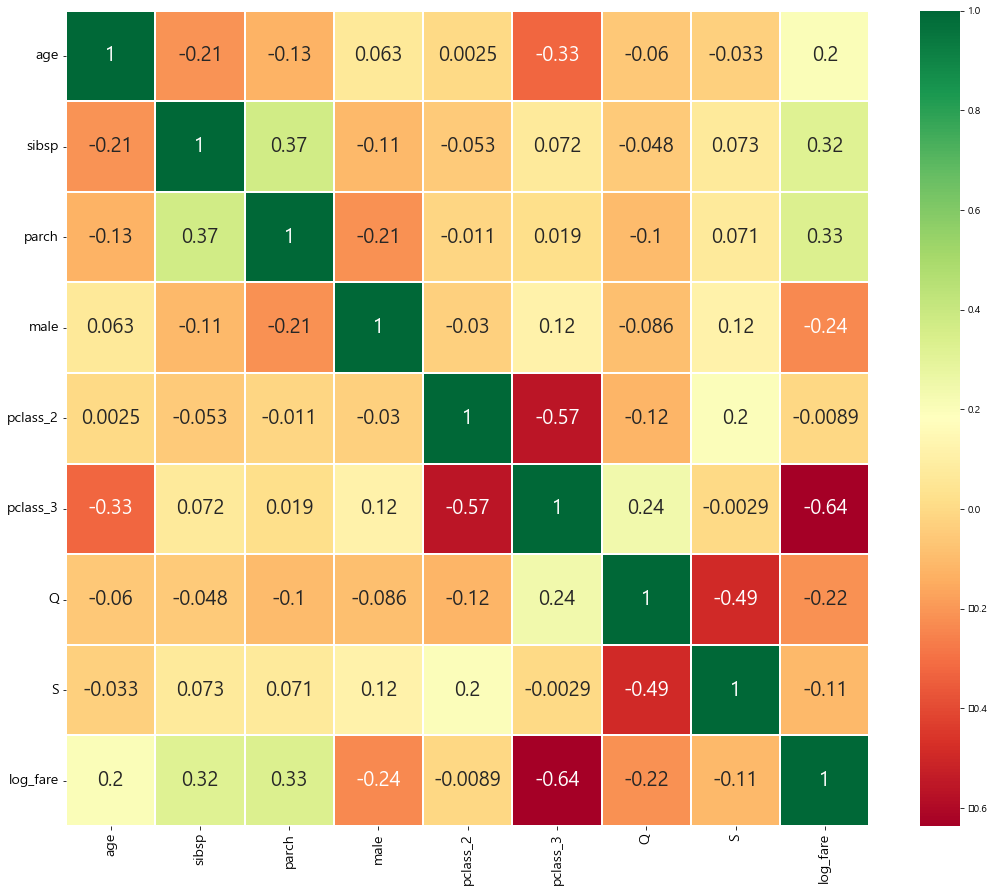

In [27]:
sns.heatmap(data_x.corr(), annot=True,cmap='RdYlGn',linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

변수 선정은 위의 독립변수들로 진행한다.

# Classification

In [28]:
data

,survived,age,sibsp,parch,fare,male,pclass_2,pclass_3,Q,S,log_fare
0,1,29.0000,0,0,211.3375,0,0,0,0,1,5.353456
1,1,0.9167,1,2,151.5500,1,0,0,0,1,5.020916
2,0,2.0000,1,2,151.5500,0,0,0,0,1,5.020916
3,0,30.0000,1,2,151.5500,1,0,0,0,1,5.020916
4,0,25.0000,1,2,151.5500,0,0,0,0,1,5.020916
...,...,...,...,...,...,...,...,...,...,...,...
1300,0,14.5000,1,0,14.4542,0,0,1,0,0,2.670985
1301,0,22.0000,1,0,14.4542,0,0,1,0,0,2.670985
1302,0,26.5000,0,0,7.2250,1,0,1,0,0,1.977547
1303,0,27.0000,0,0,7.2250,1,0,1,0,0,1.977547


## 2.1 & 2.2 training and test

In [29]:
# 사이킷런의 train_test_split 활용

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


X = data_x
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# 7:3으로 분리(7은 학습, 3은 test)

In [30]:
def train_system(func):
    print('--------------------------------------'+str(func)+'--------------------------------------')
    data_train = func
    data_train.fit(X_train, y_train) 
    pred = data_train.predict(X_test)
    
    cf_matrix = confusion_matrix(y_test,pred)

    cf_matrix_pct = []
    for i in range(len(cf_matrix)):
        for j in range(len(cf_matrix[0])):
            cf_matrix_pct.append(cf_matrix[i][j]/cf_matrix[i].sum())
    cf_matrix_pct = np.array(cf_matrix_pct).reshape(2,2)

    cf_matrix_pct

    f, ax = plt.subplots(1, 2, figsize=(15, 4))
    
    sns.heatmap(cf_matrix, annot=True,fmt='d',cmap = 'Greens',ax=ax[0])
    ax[0].set_title('confusion matrix',fontsize= 20)

    sns.heatmap(cf_matrix_pct, annot=True,fmt='.2f',cmap = 'Greens',ax=ax[1])
    ax[1].set_title('confusion matrix(percentage)',fontsize= 20)
    
    print('accuracy_score : ',accuracy_score(y_test,pred))
    print('precision_score : ',precision_score(y_test,pred))
    print('recall_score : ',recall_score(y_test,pred))
    print('f1_score : ',f1_score(y_test,pred))

### LogisticRegression

--------------------------------------LogisticRegression()--------------------------------------
accuracy_score :  0.8137755102040817
precision_score :  0.808
recall_score :  0.6733333333333333
f1_score :  0.7345454545454546


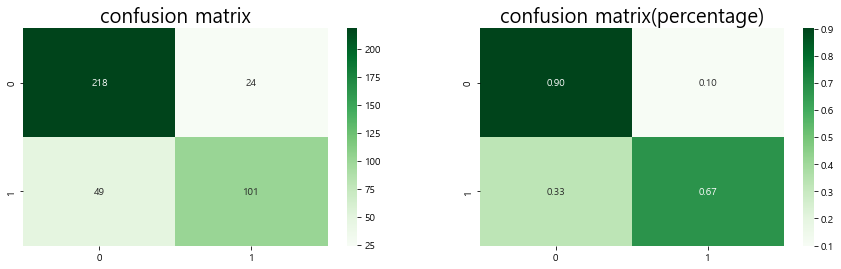

In [31]:
train_system(LogisticRegression())

### DecisionTree

--------------------------------------DecisionTreeClassifier(max_depth=3)--------------------------------------
accuracy_score :  0.8239795918367347
precision_score :  0.813953488372093
recall_score :  0.7
f1_score :  0.7526881720430109


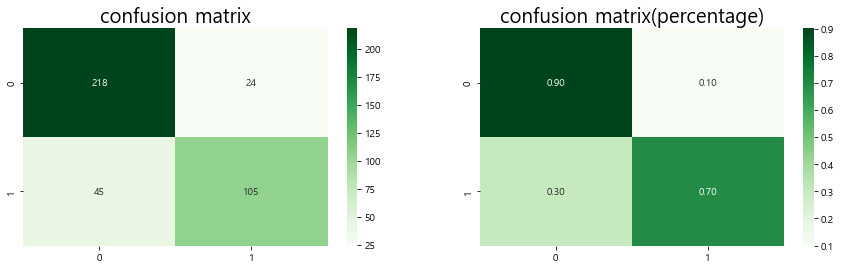

In [32]:
train_system(DecisionTreeClassifier(max_depth = 3))

### Support Vector Machine

--------------------------------------SVC()--------------------------------------
accuracy_score :  0.6454081632653061
precision_score :  0.9230769230769231
recall_score :  0.08
f1_score :  0.14723926380368096


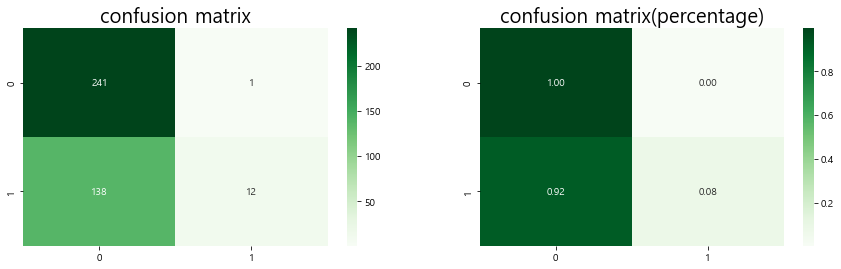

In [33]:
train_system(SVC())

### RandomForest(Emsemble)

--------------------------------------RandomForestClassifier()--------------------------------------
accuracy_score :  0.8188775510204082
precision_score :  0.7762237762237763
recall_score :  0.74
f1_score :  0.7576791808873721


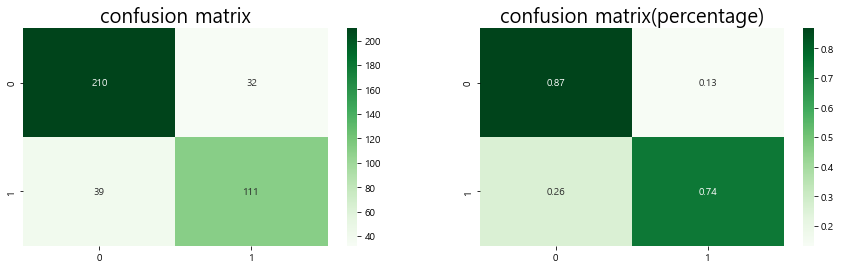

In [34]:
train_system(RandomForestClassifier())

# 모형 선택
보험사에선 이 분석결과를 이용해 개인들의 특성에 기초한 여행자보험상품을 만들려고 한다.
여행자보험시장이 경쟁적이라고 할 때 보험사가 어떤 모형을 선택하는 것이 바람직한지 설명하라.

ans : 먼저 여행자 보험시장이 경쟁적이면 소비자 입장을 고려하여 전체적인 예측력이 높은 모델을 선택해야 한다. 그 이유는 시장의 수요자들이 여러 보험사의 데이터를 비교해보고 예측력이 떨어지는 곳은 기피할 것이기 때문이다. <br> 위의 4가지 분류 모형중에서는 그래도 에측력이 SVM을 제외하고 비슷하다. 이 경우에는 보험사입장에서 남은 3가지 모형 중에 생존을 예측했지만 죽은 경우가 적은 경우를 택해야 한다. 생존을 예측했을 경우 사망보험금을 지급하지 않을 것으로 예측하고 보험 거래를 진행하였을 것이지만 이 경우 사망했을때 보험사 입장에서는 손실이기 때문이다. 이와 마찬가지로 죽는다고 예측했지만 산 경우가 많은 경우도 보험사 입장에서는 이득이다. 따라서 로지스틱, SVM, 랜덤포레스트 모형 중 생존을 예측했지만 죽은 경우가 가장 적고, 사망을 예측했지만 생존한 경우가 많은 디시젼 트리 모형을 선택해야 한다.